In [1]:
import numpy as np
import librosa
import glob
import pickle
from tqdm import tqdm

from MusicVectorizer import MusicVectorizer

SAMPLE_RATE = 16000

In [4]:
data_folders = ["90s_hiphop", "90s_rock", "2010s_pop", "classical", "country"]


# load music data and save in pickle file:
# for folder in data_folders:
#     paths = glob.glob("data/" + folder + "/*.mp3")
#     data = dict()
#     for path in tqdm(paths):
#         try:
#             data[path] = (librosa.load(path, sr=SAMPLE_RATE)[0])
#         except:
#             print("Error loading file: ", path)
#     with open("data/" + folder + ".pkl", "wb") as f:
#         pickle.dump(data, f)
        

In [5]:
# load trajectories
trajectories = dict()
for folder in data_folders:
    trajectories[folder] = np.load(f"data/{folder}_trajectories.npy", allow_pickle=True).item()

In [6]:
lengths = list()
for folder in data_folders:
    for file in trajectories[folder]:
        lengths.append(trajectories[folder][file].shape[0])

In [7]:
np.min(lengths), np.max(lengths), np.mean(lengths), np.std(lengths)

(16, 132, 52.652054794520545, 15.09248302046502)

In [13]:
N = sum([len(trajectories[folder]) for folder in data_folders])

X = np.empty((np.max(lengths), N, 768))
X[:] = np.nan

y = np.empty(N)
y[:] = np.nan

lens = np.zeros(N)

In [18]:
i = 0
for idx, folder in enumerate(data_folders):
    for file in trajectories[folder]:
        lens[i] = trajectories[folder][file].shape[0]
        X[:int(lens[i]), i, :] = trajectories[folder][file][:, 12, :]
        y[i] = idx
        i += 1

51.0

In [20]:
from sklearn.cluster import KMeans

timesteps = list()
purity_over_time = list()

for ts in tqdm(range(1, X.shape[0])):
    inputs = X[ts, (lens > ts), :]
    labels = y[lens > ts]
    if inputs.shape[0] <= 5 or np.unique(labels).shape[0] < 5:
        continue
    preds = KMeans(n_clusters=5, random_state=0).fit_predict(inputs)
    # calculate cluster purities
    counts = [np.max(np.unique(labels[preds == cluster], return_counts=True)[1]) for cluster in range(5)]
    purity = np.sum(counts) /  preds.shape[0]
    timesteps.append(ts)
    purity_over_time.append(purity)

 87%|████████▋ | 114/131 [00:00<00:00, 386.24it/s]


ValueError: n_samples=3 should be >= n_clusters=5.

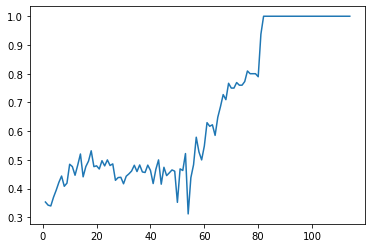

In [257]:
import matplotlib.pyplot as plt

plt.plot(timesteps, purity_over_time)

Text(0, 0.5, 'Number of songs')

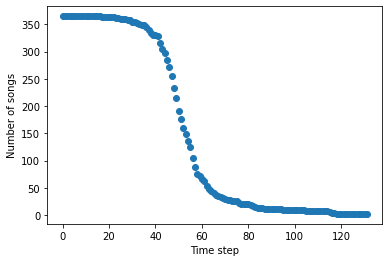

In [253]:
from matplotlib import pyplot as plt

asdf = list()
for ts in range(132):
    asdf.append(X[:, (lens >= ts), :].shape[1])

plt.scatter(range(132), asdf)
plt.xlabel("Time step")
plt.ylabel("Number of songs")


# plt.plot(range(X.shape[0]),[1])


(array([  6.,  29., 154., 129.,  22.,  13.,   2.,   2.,   6.,   2.]),
 array([ 16. ,  27.6,  39.2,  50.8,  62.4,  74. ,  85.6,  97.2, 108.8,
        120.4, 132. ]),
 <BarContainer object of 10 artists>)

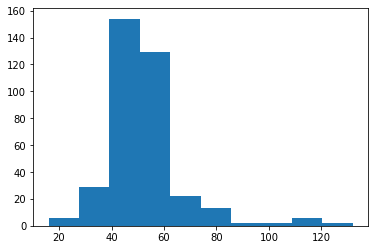

In [87]:
plt.hist(lens)

In [221]:
genre_lens = [[trajectories[i][j].shape[0] for j in trajectories[i]]for i in trajectories]

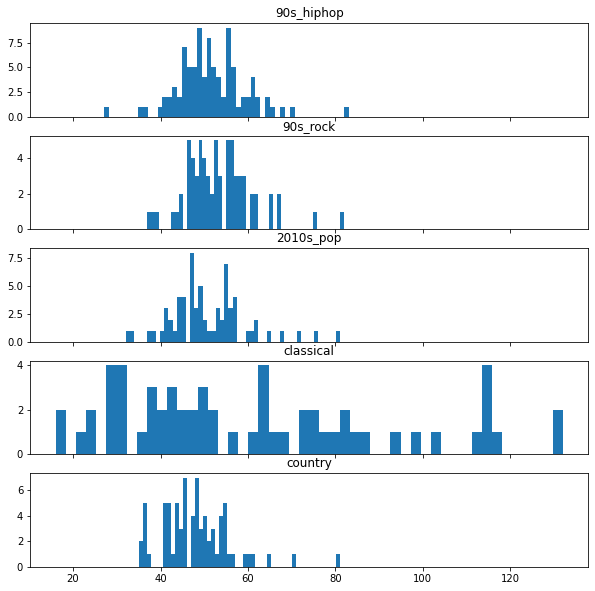

In [232]:
fig, axs = plt.subplots(5, sharex='all', squeeze=True, figsize=(10, 10))
for genre in range(5):
    axs[genre].hist(genre_lens[genre], bins=50, label=data_folders[genre])
    axs[genre].set_title(data_folders[genre])

In [11]:
]

{'data/90s_hiphop/Missy Elliott - The Rain (Supa Dupa Fly) [Official Music Video].mp3': array([[[-1.74380839e-01, -5.56553081e-02, -1.54544234e-01, ...,
           2.07583889e-01, -4.85206470e-02, -2.68998817e-02],
         [-1.51818186e-01, -1.06493169e-02, -2.79364109e-01, ...,
          -2.03318577e-02, -2.23183170e-01, -1.21433511e-02],
         [-2.27190375e-01, -8.52415711e-02, -3.86003375e-01, ...,
          -2.92266011e-01, -4.89662379e-01,  1.21146843e-01],
         ...,
         [-1.05091922e-01,  8.66702572e-02,  6.95746616e-02, ...,
          -6.08755983e-02,  6.59379642e-03,  2.06828609e-01],
         [-1.41181216e-01,  6.53295368e-02,  6.97212946e-03, ...,
          -6.66699484e-02, -2.48423009e-03,  2.01879680e-01],
         [-5.73938079e-02,  6.92718476e-02,  7.68683553e-02, ...,
          -4.44413759e-02,  1.17461257e-01, -1.15531655e-02]],
 
        [[-1.04728781e-01, -5.46453856e-02, -1.50375724e-01, ...,
           1.68937713e-01, -1.35279149e-01, -1.71817455e-03],


In [121]:
y[ts, lens >= ts]

array([3., 3., 3., 3., 3., 3., 3., 3., 3.])

In [118]:
lens.shape

(365,)

In [62]:
N

365